In [1]:
#%run 2.1_data_preparation_news.ipynb

In [2]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
import re
import ast

In [3]:
df_news = pd.read_csv('./merged_df.csv')
df_news['Date_x'] = pd.to_datetime(df_news['Date_x'], format='ISO8601')
df_news['Date_y'] = pd.to_datetime(df_news['Date_y'], format='ISO8601')
df_news['Cleaned Content'] = df_news['Cleaned Content'].apply(ast.literal_eval)

In [4]:
print("Spalten:", df_news.columns.tolist())
print("Anzahl der Einträge:", len(df_news))

df_news.head(10)

Spalten: ['Title', 'Tag', 'Date_x', 'Content', 'Cleaned Content', 'Weekday', 'Impact Date', 'Date_y', 'Open', 'Close', 'Label', 'Change', 'Sma_5', 'Volatility', 'Prev_change', 'Simple Label', 'finbert_sentiment', 'finbert_label']
Anzahl der Einträge: 13636


,Title,Tag,Date_x,Content,Cleaned Content,Weekday,Impact Date,Date_y,Open,Close,Label,Change,Sma_5,Volatility,Prev_change,Simple Label,finbert_sentiment,finbert_label
0,"TSX Slightly Down, Books Weekly Gains",Stock Market,2023-07-16,tsx slightly books weekly gains united states ...,"[tsx, slightly, books, weekly, gains, united, ...",Sunday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.011293471), 'neutral...",neutral
1,US Budget Deficit Widens More than Expected in...,Government Budget Value,2023-07-14,budget deficit widens expected june united sta...,"[budget, deficit, widens, expected, june, unit...",Friday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.6081924), 'neutral':...",negative
2,Visa Hits 24-week High,stocks,2023-07-14,visa hits week high united states stocks visa ...,"[visa, hits, week, high, united, states, stock...",Friday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.7537409), 'neutral':...",negative
3,Amazon Hits 43-week High,stocks,2023-07-14,amazon hits week high united states stocks ama...,"[amazon, hits, week, high, united, states, sto...",Friday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.5418749), 'neutral':...",negative
4,10-Year Treasury Yield Falls for 4th Session,Government Bond 10Y,2023-07-14,year treasury yield falls session united state...,"[year, treasury, yield, falls, session, united...",Friday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.018656207), 'neutral...",neutral
5,DXY Approaches 100,Currency,2023-07-14,approaches united states currency dollar index...,"[approaches, united, states, currency, dollar,...",Friday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.10120035), 'neutral'...",positive
6,US Core PPI Rises Less than Expected,Core Producer Prices MoM,2023-07-14,core ppi rises less expected united states cor...,"[core, ppi, rises, less, expected, united, sta...",Friday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.5960674), 'neutral':...",negative
7,Progressive earnings below expectations at 0.5...,Earnings,2023-07-14,progressive earnings expectations usd united s...,"[progressive, earnings, expectations, usd, uni...",Friday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.037467457), 'neutral...",neutral
8,PepsiCo earnings above expectations at 2.09 USD,Earnings,2023-07-14,pepsico earnings expectations usd united state...,"[pepsico, earnings, expectations, usd, united,...",Friday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.9225229), 'neutral':...",negative
9,US Budget Deficit Widens More than Expected in...,Government Budget Value,2023-07-14,budget deficit widens expected june united sta...,"[budget, deficit, widens, expected, june, unit...",Friday,2023-07-17,2023-07-17,14149.919922,14244.950195,3,-0.00672,14035.376172,193.458381,0.009299,negative,"{'negative': np.float32(0.6081924), 'neutral':...",negative


count    13636.000000
mean       363.468906
std        204.093993
min         53.000000
25%        155.000000
50%        347.000000
75%        525.000000
max        877.000000
Name: text_length, dtype: float64


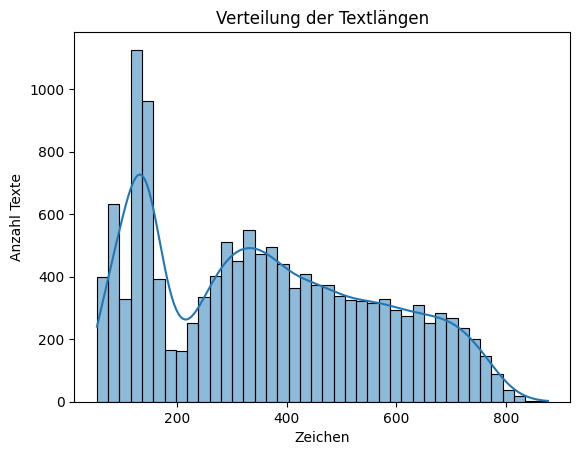

In [5]:
# Datum konvertieren
# df['date'] = pd.to_datetime(df['date']) # This column does not exist in the dataframe

# Textlänge berechnen
df_news['text_length'] = df_news['Content'].astype(str).apply(len) # Use 'Content' column

# Statistiken
print(df_news['text_length'].describe())

# Histogramm
sns.histplot(df_news['text_length'], bins=40, kde=True)
plt.title("Verteilung der Textlängen")
plt.xlabel("Zeichen")
plt.ylabel("Anzahl Texte")
plt.show()

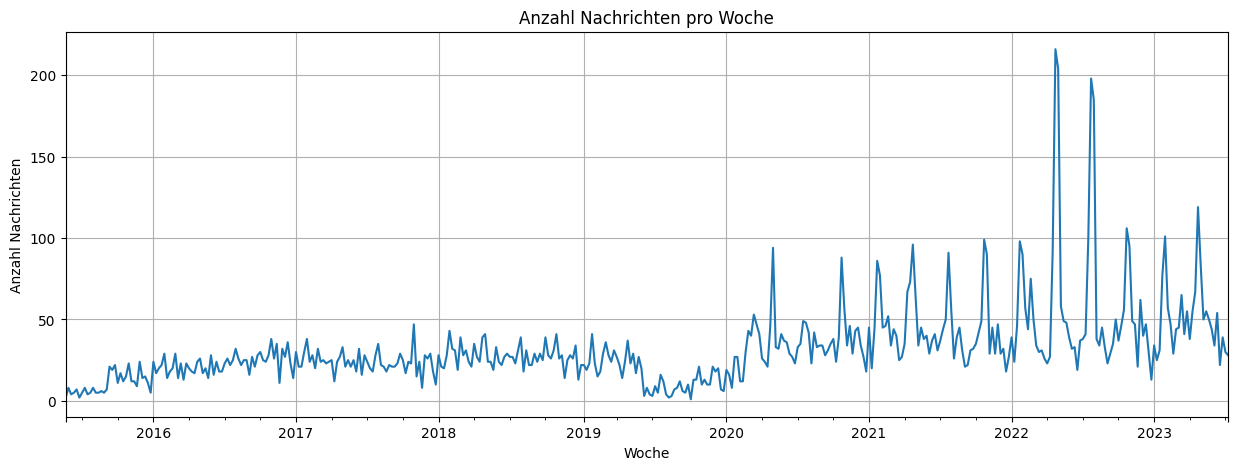

In [6]:
# Gruppierung nach Woche
weekly_counts = df_news.groupby(df_news['Date_x'].dt.to_period('W')).size()
weekly_counts.index = weekly_counts.index.to_timestamp()  # für saubere X-Achse im Plot

# Plot
weekly_counts.plot(figsize=(15, 5), title="Anzahl Nachrichten pro Woche")
plt.xlabel("Woche")
plt.ylabel("Anzahl Nachrichten")
plt.grid(True)
plt.show()


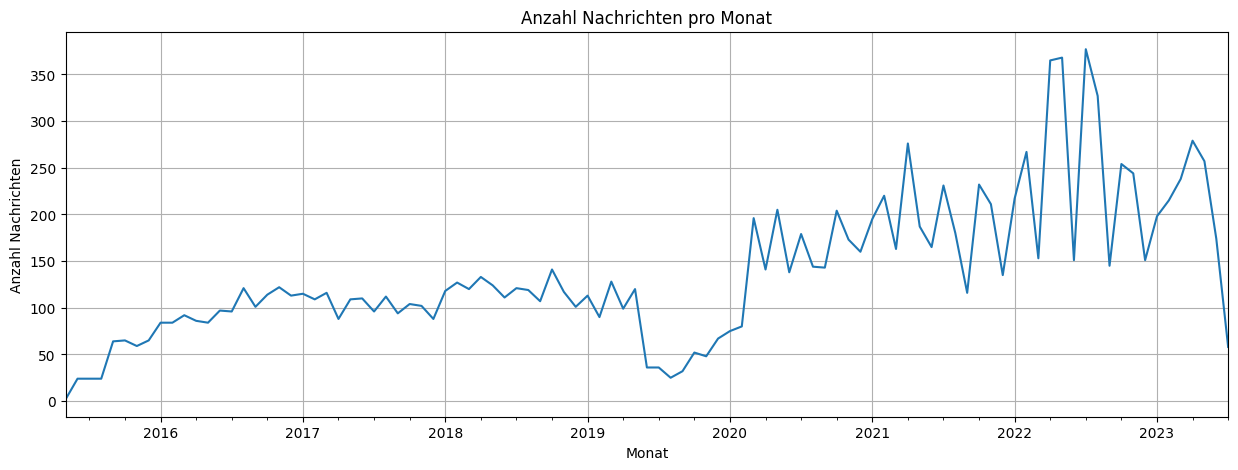

In [7]:
# Gruppieren nach Monat
monthly_counts = df_news.groupby(df_news['Date_x'].dt.to_period('M')).size()

# Optional: wieder zu Timestamp (für schöneres Plotten)
monthly_counts.index = monthly_counts.index.to_timestamp()

# Plot
monthly_counts.plot(figsize=(15,5), title="Anzahl Nachrichten pro Monat")
plt.xlabel("Monat")
plt.ylabel("Anzahl Nachrichten")
plt.grid(True)
plt.show()


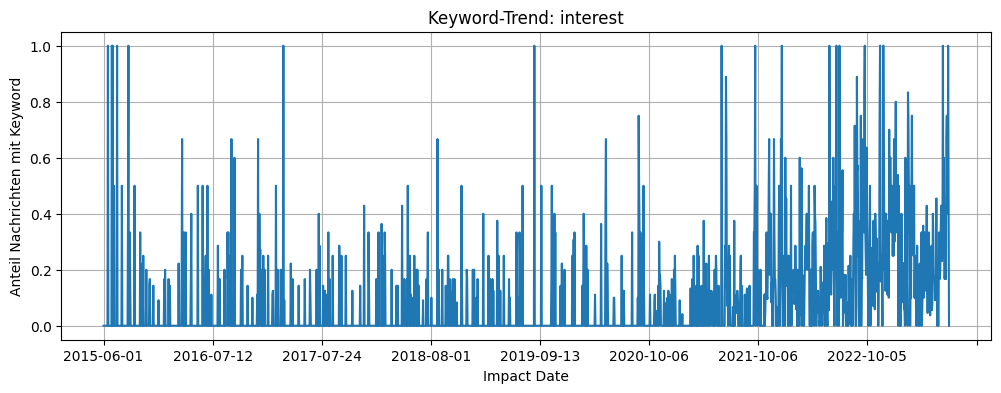

In [8]:
def keyword_trend(keyword):
    df_news['has_keyword'] = df_news['Content'].str.lower().str.contains(fr'\b{keyword}\b', na=False)
    trend = df_news.groupby('Impact Date')['has_keyword'].mean()
    trend.plot(figsize=(12,4), title=f"Keyword-Trend: {keyword}")
    plt.ylabel("Anteil Nachrichten mit Keyword")
    plt.grid(True)
    plt.show()

# Beispiel: Keyword-Analyse für „inflation“
keyword_trend("interest")

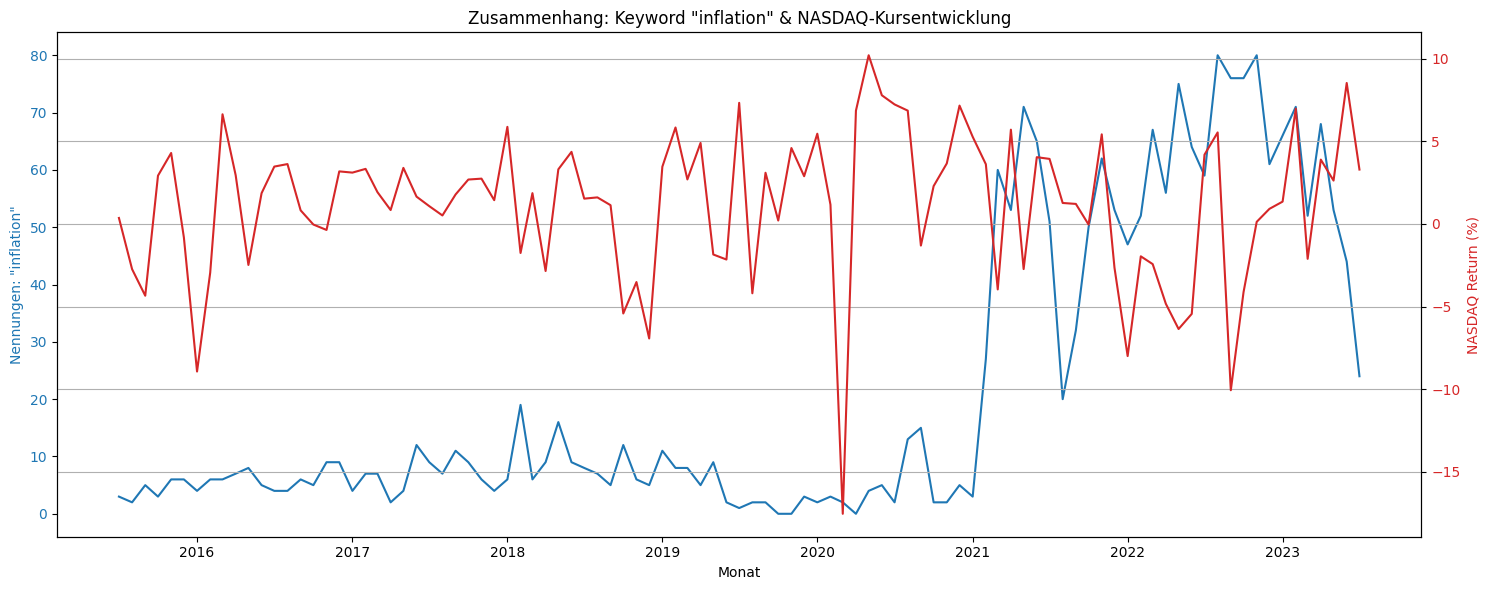

In [10]:
import matplotlib.pyplot as plt

# Sicherstellen, dass Impact Date ein datetime-Format hat
df_news['Impact Date'] = pd.to_datetime(df_news['Impact Date'])

# Monat extrahieren (z. B. "2021-05")
df_news['Month'] = df_news['Impact Date'].dt.to_period('M')

# Neues Feld: enthält Nachricht das Wort "inflation"?
df_news['has_inflation'] = df_news['Content'].str.lower().str.contains(r'\binflation\b', na=False)

# Gruppieren: Wie oft kam "inflation" in einem Monat vor?
monthly_keyword_counts = df_news.groupby('Month')['has_inflation'].sum()




# Annahme: df_price enthält Spalte 'Date' und 'Close'
df_news['Month_y'] = df_news['Date_y'].dt.to_period('M')

# Monatliches Mittel des Schlusskurses
monthly_prices = df_news.groupby('Month')['Close'].mean()

# Monatliche prozentuale Veränderung
monthly_returns = monthly_prices.pct_change()

# DataFrame zusammenbauen
df_analysis = pd.DataFrame({
    'inflation_mentions': monthly_keyword_counts,
    'nasdaq_return': monthly_returns
}).dropna()

# Monat zurück in Timestamp für schöneres Plotten
df_analysis.index = df_analysis.index.to_timestamp()

# Plot
fig, ax1 = plt.subplots(figsize=(15,6))

# Linke Achse: Keyword-Nennungen
ax1.set_xlabel('Monat')
ax1.set_ylabel('Nennungen: "inflation"', color='tab:blue')
ax1.plot(df_analysis.index, df_analysis['inflation_mentions'], color='tab:blue', label='Nennungen "inflation"')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Rechte Achse: Kursveränderung
ax2 = ax1.twinx()
ax2.set_ylabel('NASDAQ Return (%)', color='tab:red')
ax2.plot(df_analysis.index, df_analysis['nasdaq_return'] * 100, color='tab:red', label='NASDAQ Veränderung (%)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titel & Layout
plt.title('Zusammenhang: Keyword "inflation" & NASDAQ-Kursentwicklung')
fig.tight_layout()
plt.grid(True)
plt.show()


#In diesem Diagramm wird der Zusammenhang zwischen der Häufigkeit  
#des Keywords „inflation“ in Finanznachrichten und der NASDAQ-Entwicklung dargestellt.

#Die blaue Linie zeigt die Keyword-Nennungen pro Monat,  
#die rote Linie die monatliche NASDAQ-Rendite in Prozent.


In [11]:
from collections import Counter

# Sicherstellen, dass Impact Date datetime ist
df_news['Impact Date'] = pd.to_datetime(df_news['Impact Date'])

# Neue Spalte für Jahr
df_news['Year'] = df_news['Impact Date'].dt.year

# Container für Jahres-Topwörter
top_words_by_year = {}

for year, group in df_news.groupby('Year'):
    words = []
    group['Cleaned Content'].dropna().apply(lambda tokens: words.extend(tokens))
    word_counts = Counter(words).most_common(5)

    top_words_by_year[str(year)] = {
        f"Top{i+1}_Word": word for i, (word, _) in enumerate(word_counts)
    }
    top_words_by_year[str(year)].update({
        f"Top{i+1}_Count": count for i, (_, count) in enumerate(word_counts)
    })

# DataFrame erstellen
top_words_year_df = pd.DataFrame.from_dict(top_words_by_year, orient='index')
top_words_year_df.index.name = 'Jahr'

# Anzeigen
top_words_year_df

,Top1_Word,Top2_Word,Top3_Word,Top4_Word,Top5_Word,Top1_Count,Top2_Count,Top3_Count,Top4_Count,Top5_Count
Jahr,,,,,,,,,,
2015,percent,united,states,month,index,531,422,421,195,154
2016,percent,states,united,market,points,2072,1675,1674,979,974
2017,percent,united,states,market,points,2744,1747,1740,977,922
2018,percent,united,states,market,points,2783,1917,1901,1232,978
2019,percent,united,states,market,month,1555,1131,1117,663,611
2020,states,united,market,points,stock,2182,2082,1236,1200,1112
2021,united,states,earnings,usd,market,2485,2481,2031,1976,1894
2022,usd,earnings,expectations,united,states,4516,4448,3413,3273,3235
2023,united,states,earnings,usd,market,1574,1551,1136,1109,1048
